# Extension : N agents

Dans cette extension, nous allons présenter les résultats que nous avons obtenus en lancant des algorithmes avec $n$ agents. Pour se faire, l'outil a été conçu pour gérer $n$ agents (avec $n >= 2$) et $m$ items (avec $m$ un multiple de $n$). Les préférences d'un agent sont cardinalisées à l'aide du score de Borda. 

## Méthode

Un des résultats dans l'article montre la proportion d'allocations qui vérifient chacune des propriétés de Borda. Nous allons comparer nos résultats avec les leurs, en lançant les tests suivants :

* Le nombre d'agent varie entre 2 et 4.
* Le nombre d'items par agent varie entre 2 et 4, sauf pour 4 agents, qui est limité à 2 items par agent. En effet, nous n'avons pas pu générer des résultats après plusieurs heures de calculs.
* Nous allons tester chaque algorithme sur 10 000 instances d'un même problème. C'est-à-dire qu'un algorithme va résoudre 10 000 fois un problème avec $n$ agents, $m$ items constants, où seulement les préférences des agents vont changer d'une instance à une autre. Et ceux dans le but de couvrir le plus possible l'espace de recherche.

Comme algorithme, nous avons décidé de tester deux algorithmes séquentielles : _bottom up_ et _trump algorithm_. Etant séquentielle, il était plus simple de les généraliser à $n$ agents, en faisant les modifications suivantes :

* __Bottom Up__ : L'item le moins apprécié, par l'agent que l'algorithme considère actuellement, est donnée à l'agent, hormis celui en cours, qui l'apprécie le plus, pourvu que la nouvelle allocation ne dépasse pas la taille maximum. En effet, chaque agent doit posséder le même nombre d'items, donc lorsqu'il y a $3$ agents et $6$ ressources, une allocation ne peut pas avoir une taille $3$, la taille maximum par agent étant de 2.
* __Trump Algorithm__ : L'item le moins préféré de tous les autres agents mais le plus préféré par l'agent considéré lui est donné, en respectant les mêmes conditions énoncés précédemment.

Mais avant de montrer les benchmarks, les sections suivantes montrent une éxécution simple des différents algorithmes face à un même problème.

## Exécution simple - Trump

Ici, un algorithme résout un seul problème. Cela permet d'observer la trace, ainsi que les propriétés de Borda qui sont vérifiés. Par exemple, le code suivant éxécute __Trump Algorithm__ avec un problème à $3$ agents et $6$ items

In [4]:
from src.Database import *
from src.Problem import *
from src.ProblemSet import *
from src.Sequence import *
from src.Algorithm import *

# Load database
db = Database("./")

# Define a problem
nbAgents = 3
nbItems = nbAgents * 2
pb = Problem(db.get_random_agents_names(nbAgents), db.get_random_items_names(nbItems))

# Define an algorithm
trump_algo = TrumpAlgorithm(pb)

# Solve the problem according to a specific sequence
seq = Sequence.generate(pb, SequenceType.ROUND_ROBIN, True)
trump_algo.compute(seq)

|-=-=-=-=-=-=-=-=-= [ Status ]-=-=-=-=-=-=-=-=-=|
|
| Algorithm	: TrumpAlgorithm
| Sequence	: (ROUND_ROBIN) - ['Anastasie', 'Lucienne', 'Annette', 'Anastasie', 'Lucienne', 'Annette']
| Status	: INITIALIZED
|
|-=-=-=-=-=-=-=-=-= [ Problem ]-=-=-=-=-=-=-=-=-=|
|
| Name : Agents_3_Items_6
|
| [3] Agents :
|	1 : Agent Anastasie
|		 Items : set()
|		 Utility : 0
|		 Rankings : knife > mouse pad > bracelet > sponge > sharpie > apple
|	2 : Agent Annette
|		 Items : set()
|		 Utility : 0
|		 Rankings : sharpie > apple > knife > mouse pad > bracelet > sponge
|	3 : Agent Lucienne
|		 Items : set()
|		 Utility : 0
|		 Rankings : sponge > knife > sharpie > mouse pad > apple > bracelet
|
| [6] Items :
|	1 : bracelet
|	2 : knife
|	3 : sharpie
|	4 : mouse pad
|	5 : sponge
|	6 : apple
|
|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|

|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|
|-=-=-=-=-=-=-=-=-= [ START ]-=-=-=-=-=-=-=-=-=|
|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|

... Considering ra

L'éxécution s'est normalment faite avec une séquence de type _Round Robin_. Toutefois, il est possible de tester avec une séquence de type _Balanced_ en remplacant la ligne correspondante avec celle-ci :

In [7]:
seq = Sequence.generate(pb, SequenceType.BALANCED, True)

## Exécution simple - Bottom Up

Le code suivant permet de résoudre le même problème enoncé précedemment avec l'algorithme __Bottom Up__ :

In [6]:
from src.Database import *
from src.Problem import *
from src.ProblemSet import *
from src.Sequence import *
from src.Algorithm import *

# Load database
db = Database("./")

# Define a problem
nbAgents = 3
nbItems = nbAgents * 2
pb = Problem(db.get_random_agents_names(nbAgents), db.get_random_items_names(nbItems))

# Define an algorithm
bottom_up_algo = BottomUpAlgorithm(pb)

# Solve the problem according to a specific sequence
seq = Sequence.generate(pb, SequenceType.ROUND_ROBIN, True)
bottom_up_algo.compute(seq)

|-=-=-=-=-=-=-=-=-= [ Status ]-=-=-=-=-=-=-=-=-=|
|
| Algorithm	: BottomUpAlgorithm
| Sequence	: (ROUND_ROBIN) - ['Daniele', 'Annette', 'Francois', 'Daniele', 'Annette', 'Francois']
| Status	: INITIALIZED
|
|-=-=-=-=-=-=-=-=-= [ Problem ]-=-=-=-=-=-=-=-=-=|
|
| Name : Agents_3_Items_6
|
| [3] Agents :
|	1 : Agent Daniele
|		 Items : set()
|		 Utility : 0
|		 Rankings : sponge > thermostat > bananas > plate > apple > sharpie
|	2 : Agent Francois
|		 Items : set()
|		 Utility : 0
|		 Rankings : apple > sharpie > thermostat > plate > sponge > bananas
|	3 : Agent Annette
|		 Items : set()
|		 Utility : 0
|		 Rankings : sharpie > bananas > plate > apple > sponge > thermostat
|
| [6] Items :
|	1 : bananas
|	2 : thermostat
|	3 : plate
|	4 : sharpie
|	5 : sponge
|	6 : apple
|
|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|

|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|
|-=-=-=-=-=-=-=-=-= [ START ]-=-=-=-=-=-=-=-=-=|
|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|

----- Round 1-----
Re

## Benchmark

Désormais, nous allons étudier la proportions d'allocations vérifiant les propriétés de Borda selon les différents algorithmes. Le code suivant permet de générér les résultats pour un problème avec 3 agents et 6 items.

__*Note: Pour plus de 12 ressources et 4 agents, le temps de calcul est très long.*__

... number of possible permutations for preferences : 720
... generating permutations
... generating instances
|-=-=-=-=-=-= [ STARTING BENCHMARK ] =-=-=-=-=-=-=|
|-=-=-=-=-=-=-=-=-= [ Problem ]-=-=-=-=-=-=-=-=-=|
|
| Name : Agents_3_Items_6
|
| [3] Agents :
|	1 : Agent Edwige
|		 Items : set()
|		 Utility : 0
|		 Rankings : stockings > knife > carrots > controller > coasters > nail clippers
|	2 : Agent Annette
|		 Items : set()
|		 Utility : 0
|		 Rankings : controller > coasters > knife > carrots > nail clippers > stockings
|	3 : Agent Alice
|		 Items : set()
|		 Utility : 0
|		 Rankings : controller > coasters > carrots > stockings > knife > nail clippers
|
| [6] Items :
|	1 : carrots
|	2 : stockings
|	3 : knife
|	4 : nail clippers
|	5 : coasters
|	6 : controller
|
|-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=|
|-=-=-=-=-=-=-=-=-= [ SUMMARY ]-=-=-=-=-=-=-=-=-=|
|
| Problem         : Agents_3_Items_6
| Algorithms      : ['BottomUpAlgorithm', 'TrumpAlgorithm']
| Sequence        : 

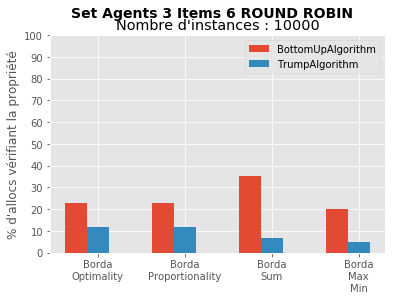

<Figure size 432x288 with 0 Axes>

In [8]:
from src.Database import *
from src.Problem import *
from src.ProblemSet import *
from src.Sequence import *
from src.Algorithm import *

# Load database
db = Database("./")

# Define a problem
nbAgents = 3
nbItems = nbAgents * 2
initial_pb = Problem(db.get_random_agents_names(nbAgents), db.get_random_items_names(nbItems))

# Create a set of different instances of a problem
algorithms = [BottomUpAlgorithm, TrumpAlgorithm]
limit = 10000
pb_set = ProblemSet(initial_pb, algorithms, limit)

# Test with a specific sequence
seq = Sequence.generate(initial_pb, SequenceType.ROUND_ROBIN, True)
pb_set.run(seq)
pb_set.show_results()

## Résultats

Voici le résultats des exécutions que nous avons menées, pour des problèmes allant de 2 à 4 agents et en augmentant le nombre d'items en fonction du nombre d'agents: 

![Title](img/Set_Agents_2_Items_4_ROUND_ROBIN.png)
![Title](img/Set_Agents_2_Items_6_ROUND_ROBIN.png)
![Title](img/Set_Agents_2_Items_8_ROUND_ROBIN.png)
![Title](img/Set_Agents_2_Items_10_ROUND_ROBIN.png)
![Title](img/Set_Agents_3_Items_6_ROUND_ROBIN.png)
![Title](img/Set_Agents_3_Items_9_ROUND_ROBIN.png)
![Title](img/Set_Agents_3_Items_12_ROUND_ROBIN.png)
![Title](img/Set_Agents_4_Items_8_ROUND_ROBIN.png)

Comme nous pouvons le voir, plus le nombre d'agents est grand et plus le nombre d'items est grand, plus la proportion d'algorithme vérifiant chaque propriété de Borda est faible. La tendance est similaire à celle de la figure 6 de l'article. D'après les différents test, __Bottom Up__ semble plus efficace pour trouver une solution vérifiant une des propriétés que __Trump Algorithm__. Un des raisons peut être que ce dernier algorithme ne renvoie aucune allocation si il n'existe pas d'allocation _envy free_. Ce qui est très souvent le cas, selon nos tests, lorsqu'il y a plus de 3 agents, comme vous avez pu tester dans une des sections précédentes.